# Chapter 5 - Basic Math and Statistics
## Segment 7 - Transforming dataset distributions

In [5]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Normalizing and transforming features with MinMaxScalar() and fit_transform()

#### Normalization: putting each observation on a relative scale between the values of 0 and 1
$ \frac{Value \hspace{0.2cm} of \hspace{0.2cm}observation}{Sum \hspace{0.2cm}of \hspace{0.2cm}all \hspace{0.2cm}observations \hspace{0.2cm}in \hspace{0.2cm}variable}
$
#### Standardization: rescaling data so that is has a zero mean and unit variance

In [1]:
address = r'C:\Users\fsabena\OneDrive - MicroStrategy, Inc\Capacitaciones y Cursos\Python for Data Science (Linkedin Learning)\Ex_Files_Python_Data_Science_EssT_Pt_1\Exercise Files\Data\mtcars.csv'
cars = pd.read_csv(address)
## Este comando me sirve para cambiarle el nombre a la columna que estaba como 'Unnamed: 0'
cars.rename( columns={'Unnamed: 0':'car_names'}, inplace=True )
cars

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


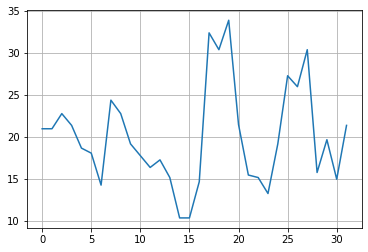

In [12]:
mpg = cars.mpg
plt.grid()
plt.plot(mpg)

In [10]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


### Video explicativo de reshapes
[Explicación de los reshapes](https://www.youtube.com/watch?v=3wi0lJPfLUY)

Matriz de 1 columna por n filas:
 [[0.45106383]
 [0.45106383]
 [0.52765957]
 [0.46808511]
 [0.35319149]
 [0.32765957]
 [0.16595745]
 [0.59574468]
 [0.52765957]
 [0.37446809]
 [0.31489362]
 [0.25531915]
 [0.29361702]
 [0.20425532]
 [0.        ]
 [0.        ]
 [0.18297872]
 [0.93617021]
 [0.85106383]
 [1.        ]
 [0.47234043]
 [0.21702128]
 [0.20425532]
 [0.12340426]
 [0.37446809]
 [0.71914894]
 [0.66382979]
 [0.85106383]
 [0.22978723]
 [0.39574468]
 [0.19574468]
 [0.46808511]]


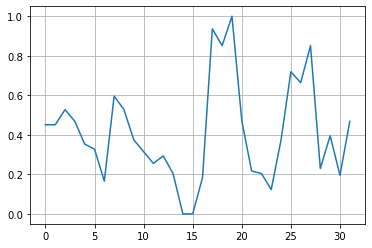

In [45]:
## Lo que hace este comando, es convertir la serie de valores en una matriz de 1 columna y n filas (-1,1), 
## si fuera al revez(1,-1) la convertiría en una matriz de una fila por n columnas.
mpg_matrix = mpg.values.reshape(-1,1) 
scaled = preprocessing.MinMaxScaler() ## Llama a la función min max scaler de sklearn
scaled_mpg = scaled.fit_transform(mpg_matrix) ## Normaliza los valores de mpg_matrix
print('Matriz de 1 columna por n filas:\n',scaled_mpg)
plt.plot(scaled_mpg) ## Nos muestra excatamente el mismo gráfico que antes, pero normalizado
plt.grid()

In [36]:
## Que está haciendo por detrás la funcion MinMaxScaler?
print ('Los valores de la serie mpg son:\n',mpg)
max_mpg=mpg.max()
min_mpg=mpg.min()
print('El valor máximo de la serie es: ',max_mpg)
print('El valor mínimo de la serie es: ',min_mpg)

Los valores de la serie mpg son:
 0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64
El valor máximo de la serie es:  33.9
El valor mínimo de la serie es:  10.4


### Se puede ver como funciona el algoritmo por detras con la siguiente función. Devuelve lo mismo que el minmax scales. Y se hace con el fin de entender que está pasando detrás de ese algoritmo.

In [37]:
for i in mpg:
    normalizacion=(i-min_mpg)/(max_mpg-min_mpg)
    print (normalizacion)

0.451063829787234
0.451063829787234
0.5276595744680851
0.4680851063829786
0.3531914893617021
0.32765957446808514
0.16595744680851066
0.5957446808510638
0.5276595744680851
0.3744680851063829
0.3148936170212766
0.25531914893617014
0.2936170212765958
0.20425531914893613
0.0
0.0
0.18297872340425528
0.9361702127659575
0.851063829787234
1.0
0.47234042553191485
0.21702127659574466
0.20425531914893613
0.12340425531914895
0.3744680851063829
0.7191489361702127
0.6638297872340425
0.851063829787234
0.22978723404255322
0.3957446808510638
0.1957446808510638
0.4680851063829786


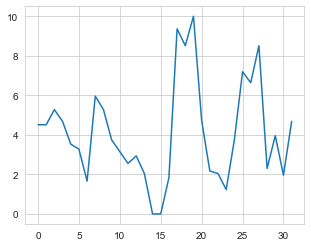

In [11]:
scaled = preprocessing.MinMaxScaler(feature_range=0,10) ## Llama a la función min max scaler de sklearn, y ahora reduce todo
scaled_mpg = scaled.fit_transform(mpg_matrix) ## Normaliza los valores de mpg_matrix
print('Matriz de 1 columna por n filas:\n',scaled_mpg)
plt.plot(scaled_mpg) ## Nos muestra excatamente el mismo gráfico que antes, pero normalizado

### Using scale() to scale your features

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]


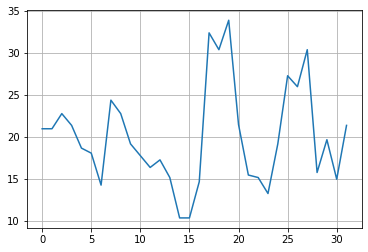

In [50]:
standardized_mpg = scale(mpg,axis=0, with_mean=False, with_std=False)
print(standardized_mpg)
plt.plot(standardized_mpg)
plt.grid()

[ 0.15329914  0.15329914  0.4567366   0.22072968 -0.23442651 -0.33557233
 -0.97616253  0.72645879  0.4567366  -0.15013833 -0.38614524 -0.62215216
 -0.47043343 -0.8244438  -1.63361037 -1.63361037 -0.90873199  2.07506974
  1.737917    2.32793429  0.23758732 -0.77387089 -0.8244438  -1.1447389
 -0.15013833  1.21533026  0.99618098  1.737917   -0.72329798 -0.06585014
 -0.85815908  0.22072968]


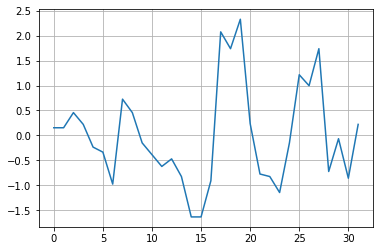

In [60]:
standardized_mpg = scale(mpg)
print(standardized_mpg)
plt.plot(standardized_mpg)
plt.grid()